In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('/Users/michaelkareev/Desktop/Data Science Recruiting Related/Algos/Mall_Customers.csv')

In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [5]:
df_d = pd.get_dummies(df)
print(list(df_d.columns))

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']


In [6]:
df_d.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


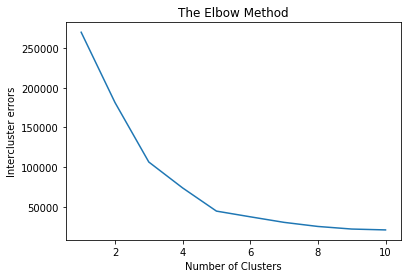

In [14]:
# Elbow method
wcss = []
for i in range(1,11):
    clf = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
    clf.fit(df_d.iloc[:,2:4])  # using Annual income and Spending Score for clustering
    wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intercluster errors')
plt.show()    

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_d.iloc[:,2:4])

In [19]:
X = df_d.iloc[:,2:4].values

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

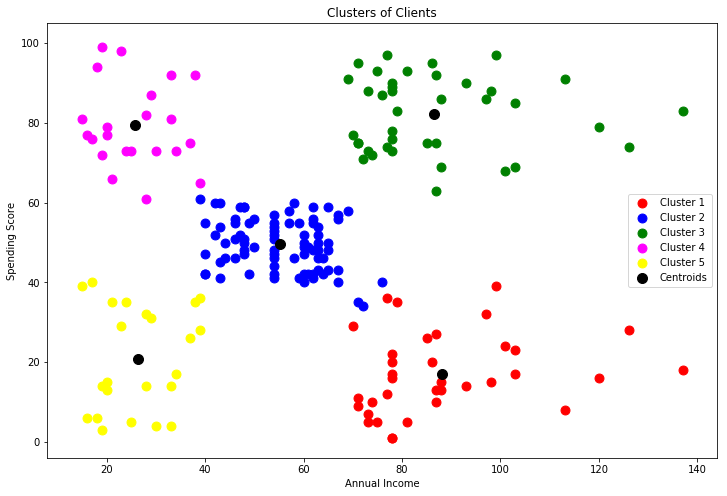

In [33]:
#Visualizing the clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s = 80, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s = 80, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c='black', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()